### Client Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Cliient Data

In [2]:
df_cl=pd.read_csv('/content/client_data.csv')

In [3]:
df_cl.shape

(14606, 26)

In [4]:
df_cl.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [30]:
df_cl.columns


Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [5]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
df_cl.describe(include='all').style.background_gradient(axis=None, cmap='YlOrRd')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,14606.000000,14606.000000,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,nan,nan,nan,1796,368,2129,386,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,nan,nan,nan,nan,6,nan,nan
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,nan,nan,nan,2009-08-01,2016-02-01,2015-11-01,2015-06-23,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,nan,nan,nan,nan,lxidpiddsbxsbosboudacockeimpuepw,nan,nan
freq,1,6754,nan,nan,nan,95,145,721,587,nan,nan,nan,nan,nan,nan,nan,11955,nan,nan,nan,nan,nan,nan,7097,nan,nan
mean,nan,nan,159220.286252,28092.375325,16090.269752,nan,nan,nan,nan,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,nan,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,nan,18.135136,0.097152
std,nan,nan,573465.264198,162973.059057,64364.196422,nan,nan,nan,nan,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,nan,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,nan,13.534743,0.296175
min,nan,nan,0.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,nan,3.300000,0.000000
25%,nan,nan,5674.750000,0.000000,0.000000,nan,nan,nan,nan,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,nan,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,nan,12.500000,0.000000
50%,nan,nan,14115.500000,0.000000,792.500000,nan,nan,nan,nan,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,nan,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,nan,13.856000,0.000000
75%,nan,nan,40763.750000,0.000000,3383.000000,nan,nan,nan,nan,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,nan,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,nan,19.172500,0.000000


In [7]:
df_cl.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

Show missing values

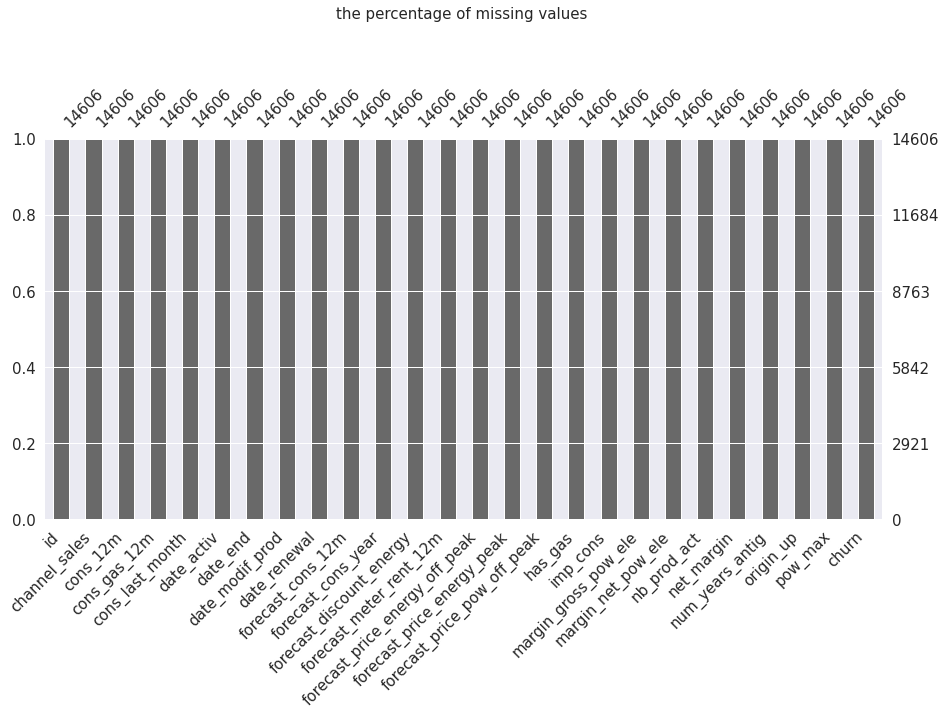

In [29]:
msno.bar(df_cl,figsize=(15,7),fontsize=15)
plt.title("the percentage of missing values ",y=1.3,fontsize=15)
plt.show()

In [31]:
df_cl.duplicated().sum()

0

Now Will get Insights about Data 

I will divide data into subsets Columns Related with time forcasting and data specific for clients

Do  frequency count to select unique value counts

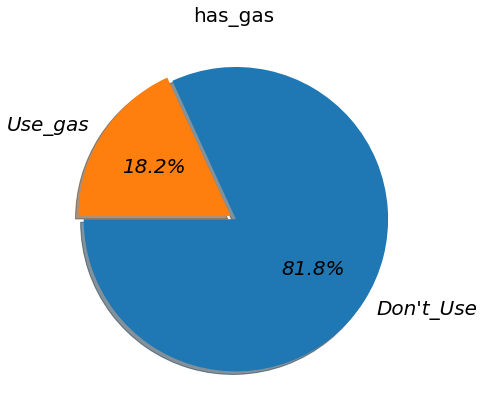

In [10]:
pie=df_cl["has_gas"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=[ "Don't_Use","Use_gas"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('has_gas', fontsize=20)
plt.show()

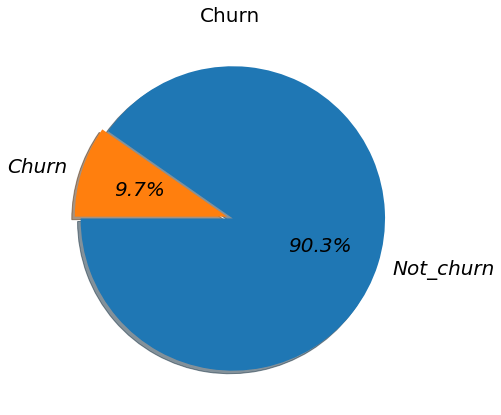

In [11]:
pie=df_cl["churn"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["Not_churn","Churn"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('Churn', fontsize=20)
plt.show()

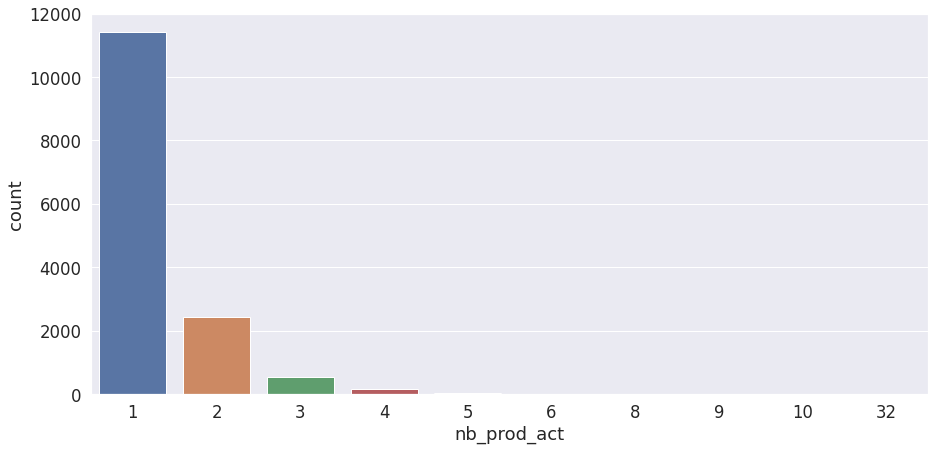

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_cl, x="nb_prod_act")

we have five products the major for sales product one

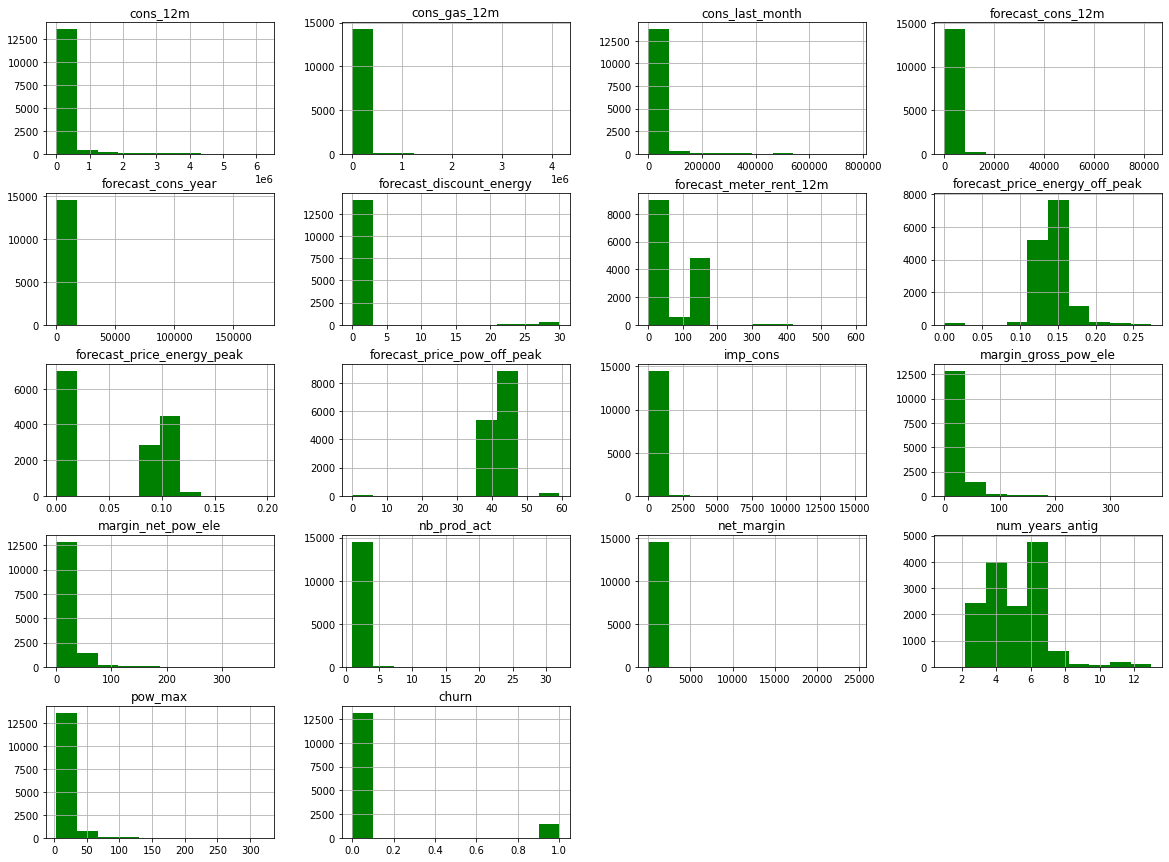

In [13]:
#histogram to see the distripution of each columns
df_cl.hist(figsize=(20,15),color='green')
plt.show()


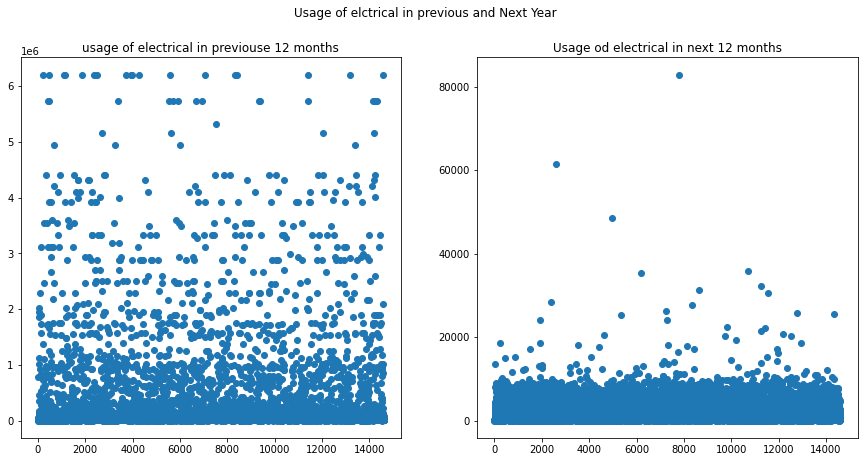

In [21]:
#electric in previous 12 month and next 12 month

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].scatter(df_cl.index, df_cl['cons_12m'])
ax[0].set_title("usage of electrical in previouse 12 months")

ax[1].scatter(df_cl.index, df_cl['forecast_cons_12m'])
ax[1].set_title("Usage od electrical in next 12 months")
 
fig.suptitle('Usage of elctrical in previous and Next Year')
plt.show()


Text(0.5, 1.0, 'Usage of Gas in previous 12 months')

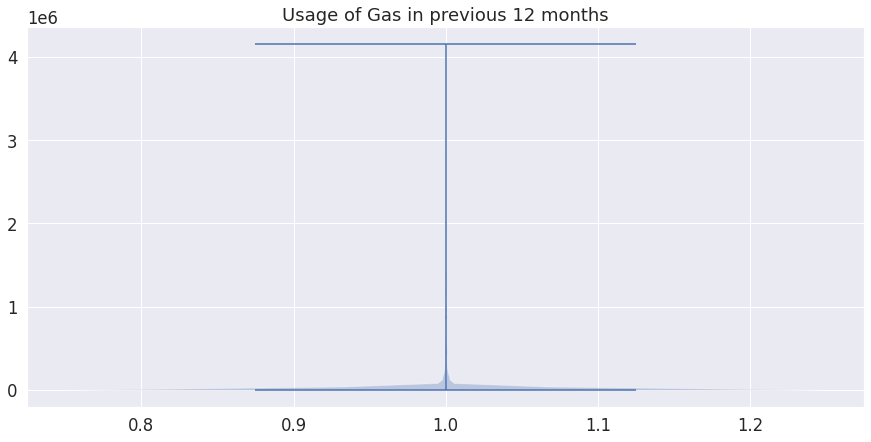

In [55]:
#useag of gas in previous 12 months 
plt.figure(figsize=(15,7))
plt.violinplot(df_cl['cons_gas_12m'])
plt.title('Usage of Gas in previous 12 months')

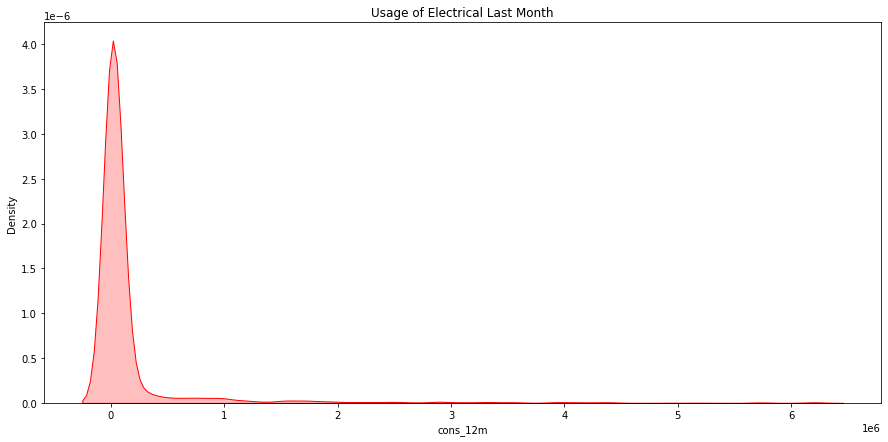

In [41]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_cl['cons_12m'], shade=True,color='red')

plt.title("Usage of Electrical Last Month")


plt.show()

Text(0.5, 0.98, 'Forecast of Energy prices')

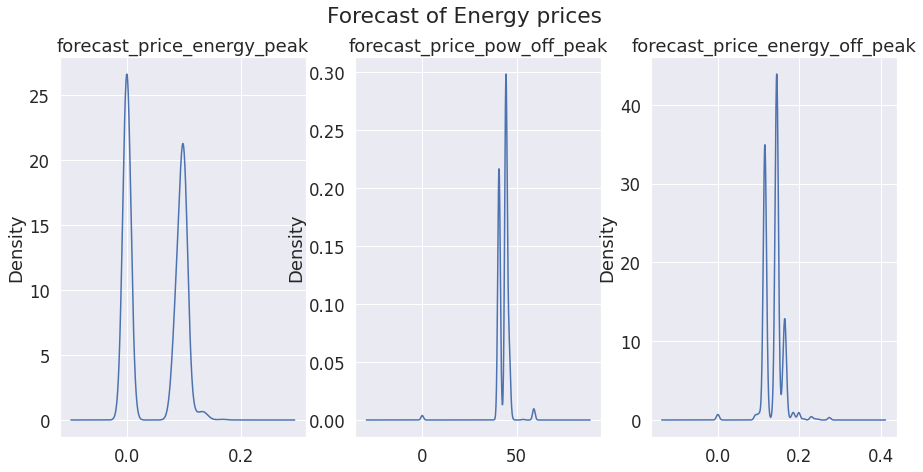

In [53]:
#let us see te prices of energy in next time

sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

df_cl['forecast_price_energy_peak'].plot(kind="kde", ax=ax[0])
ax[0].set_title("forecast_price_energy_peak")

df_cl['forecast_price_pow_off_peak'].plot(kind="kde", ax=ax[1])
ax[1].set_title("forecast_price_pow_off_peak")

df_cl['forecast_price_energy_off_peak'].plot(kind="kde", ax=ax[2])
ax[2].set_title("forecast_price_energy_off_peak")

# Add a title to the figure
fig.suptitle("Forecast of Energy prices")



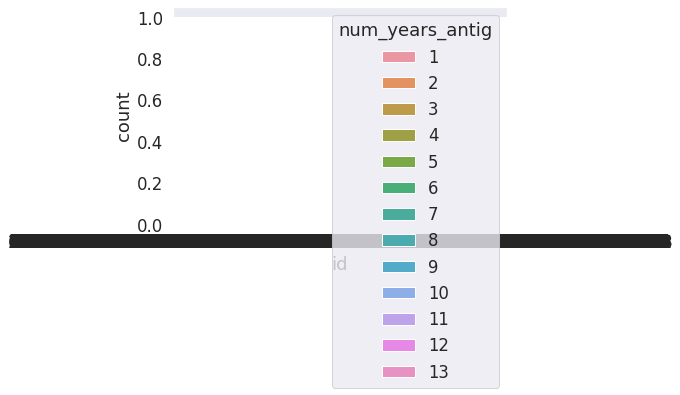

In [38]:
#present the max_year of each client with service 
sns.countplot(data=df_cl, x='id', hue='num_years_antig')
plt.show()


Text(0.5, 1.0, 'Mean of Net Margin')

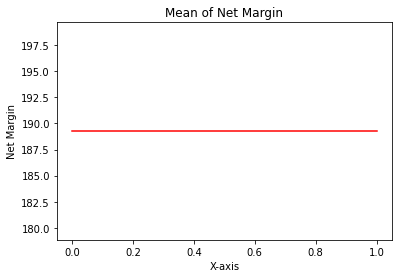

In [15]:
#get mean of net_margin 
mean_net_margin = df_cl['net_margin'].mean()
#plot result
plt.plot([0, 1], [mean_net_margin, mean_net_margin], color='red')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Net Margin')
plt.title('Mean of Net Margin')

Text(0.5, 1.0, 'Mean of imp_cons')

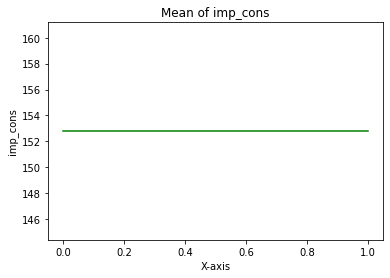

In [5]:
#get mean of imp_cons
mean_imp_cons = df_cl['imp_cons'].mean()
#plot result
plt.plot([0, 1], [mean_imp_cons, mean_imp_cons], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('imp_cons')
plt.title('Mean of imp_cons')


Text(0.5, 1.0, 'Mean of forecast_meter_rent_12m')

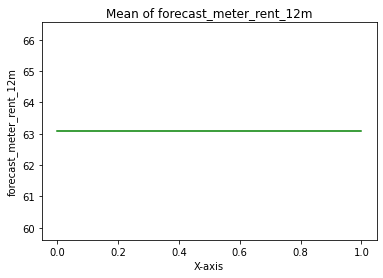

In [6]:
#get mean of forecast_meter_rent_12m
mean_forecast_meter_rent_12m = df_cl['forecast_meter_rent_12m'].mean()
#plot result
plt.plot([0, 1], [mean_forecast_meter_rent_12m, mean_forecast_meter_rent_12m], color='green')

# add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('forecast_meter_rent_12m')
plt.title('Mean of forecast_meter_rent_12m')


In [17]:
#convert date to date_time
df_cl['date_activ'] = df_cl['date_activ'].apply(pd.to_datetime)
df_cl['date_end'] = df_cl['date_end'].apply(pd.to_datetime)
df_cl['date_modif_prod'] = df_cl['date_modif_prod'].apply(pd.to_datetime)
df_cl['date_renewal'] = df_cl['date_renewal'].apply(pd.to_datetime)

Text(0.5, 1.0, 'date of activation of the contract')

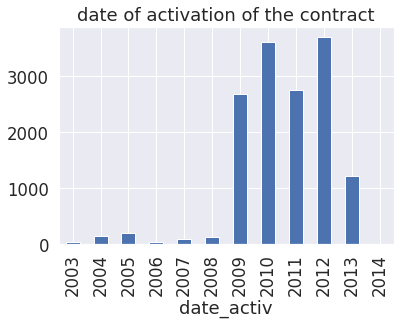

In [19]:
#see number of client using (ID) with date of activation of the contract
grouped_data = df_cl['id'].groupby(df_cl['date_activ'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of activation of the contract')


Text(0.5, 1.0, 'registered date of the end of the contract')

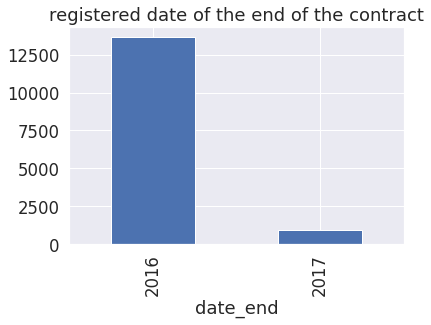

In [20]:
#see number of client (ID) that registered date of the end of the contract
grouped_data = df_cl['id'].groupby(df_cl['date_end'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('registered date of the end of the contract')

Text(0.5, 1.0, 'date of the last modification of the product')

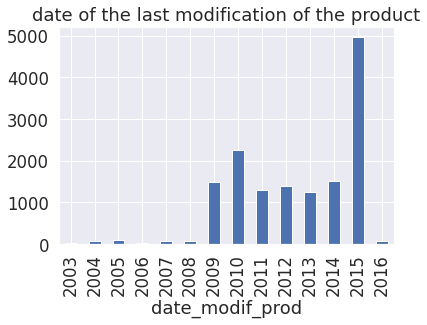

In [21]:
#see number of clients(ID) that date of the last modification of the product
grouped_data = df_cl['id'].groupby(df_cl['date_modif_prod'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of the last modification of the product')


Text(0.5, 1.0, 'date of the next contract renewal')

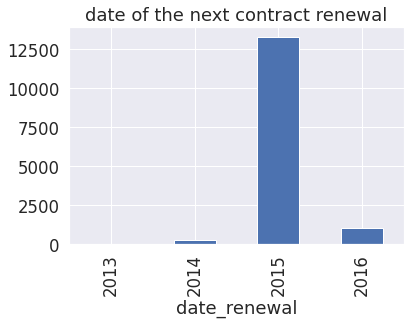

In [22]:
#number of clients (ID) that date of the next contract renewal
grouped_data = df_cl['id'].groupby(df_cl['date_renewal'].dt.year).count()
#plot
grouped_data.plot(kind='bar')
#title
plt.title('date of the next contract renewal')


Text(0.5, 1.0, 'select the chanel sales with churn to see which chanel will churn and which not')

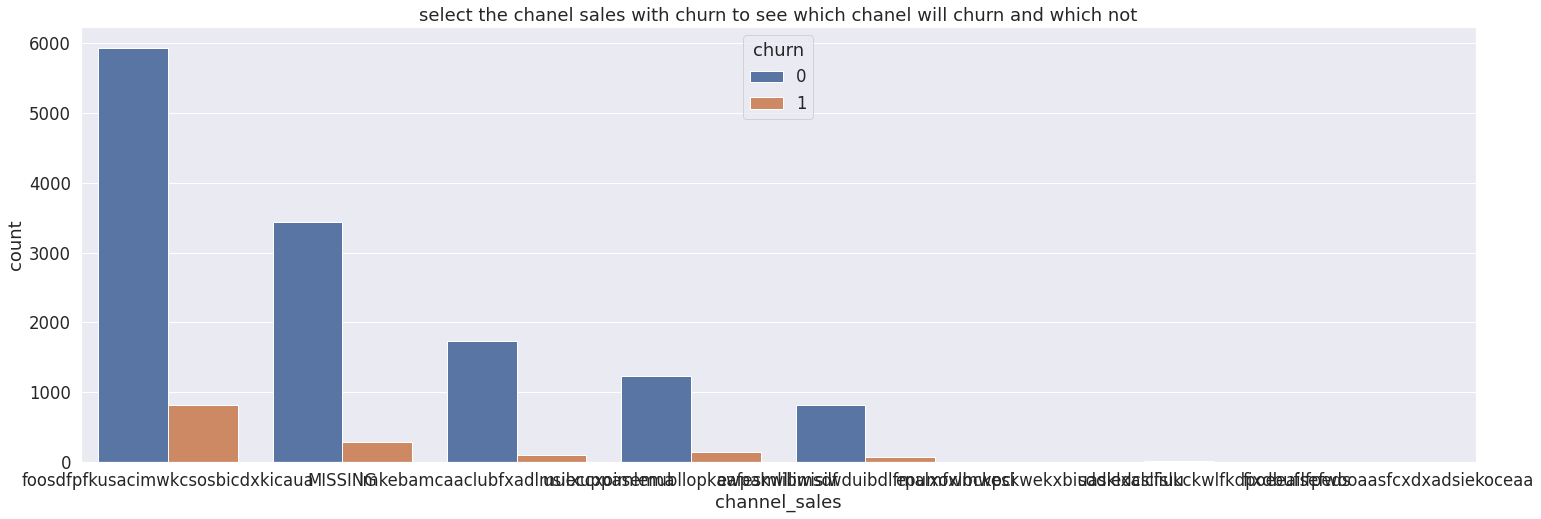

In [28]:
#select the chanel sales with churn to see which chanel will churn and which not
plt.figure(figsize=(25,8))
sns.countplot(x='channel_sales',hue='churn',data=df_cl)
#titlr
plt.title('select the chanel sales with churn to see which chanel will churn and which not')